<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#Task 1: Familiarize with Dataset
boston_df[:10]
#to get an overview of column names 
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


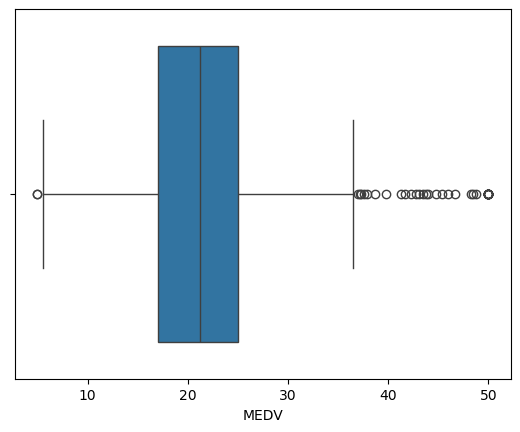

In [6]:
#Task 2: Generate descriptive statistics and visualizations
#Task 2a: Boxplot: Median value of owner occupied homes
ax1 = sns.boxplot(x=boston_df['MEDV'])

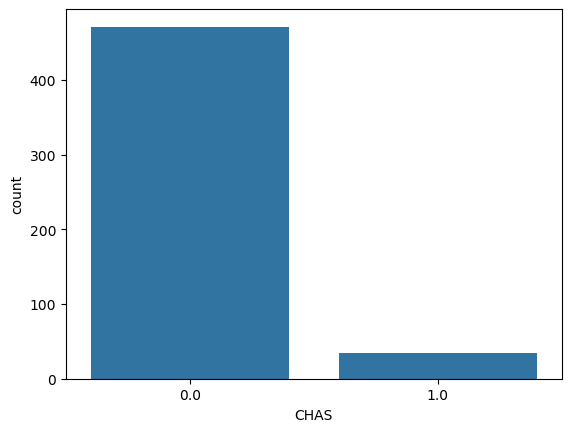

In [7]:
#Task 2b: Bar plot: Charles river variable
ax2 = sns.countplot(boston_df, x = 'CHAS')

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

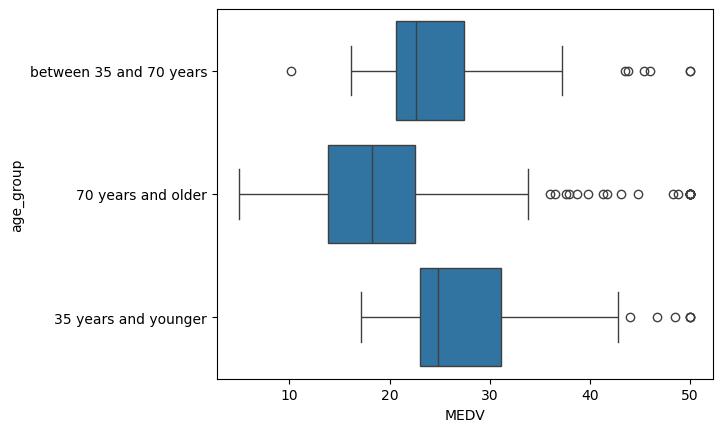

In [9]:
#Task 2c: Boxplot: MEDV variable vs. the AGE variable
#Discretize the age variable iontp three groups: 
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 years and older'

sns.boxplot(data = boston_df, x = 'MEDV', y = 'age_group')


<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

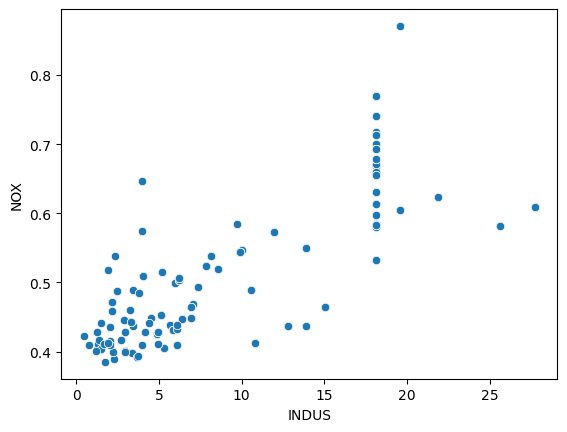

In [10]:
# Task 2d: Scatterplot of relatiponship between Nitricid oxide concentration and the proportion of non-retail business
sns.scatterplot(boston_df, x = 'INDUS', y = 'NOX')

#The plot suggests a positive relationship between the proportion of non-retail business acres per town and Nitricid oxide concentration. 

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

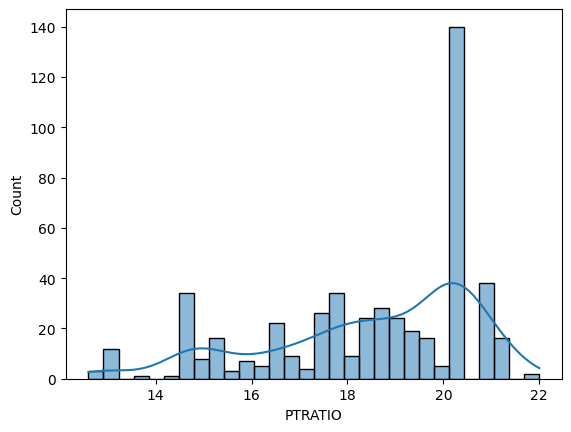

In [11]:
#Task 2e: Histogram for the pupil to teacher ration variable
sns.histplot(boston_df, x = 'PTRATIO', bins = 30, kde = True)

In [15]:
#Task 3: Use the appropriate tests to answer the questions provided. 
#Task 3a: Is there a significant difference in median values of houses bound by the Charles river or not (T-test for independent samples).

#H0: Properties bound by the Charles river have the same median values as properties not bound by the Charles river. 
#H1: Properties bound by the CHarles river have a different median value as properties not bound by the river. 

#Levene's test for equality of variance 
Levene_test = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                                 boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')
print(Levene_test)

#P-value < 0.05 --> the Null hypothesis of equality of variance is rejected. 

T_test = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                               boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print(T_test)
#Conclusion: P-value < 0.05 --> the Null hypothesis of equal median values is rejected. There is a statistical significant difference in median values for houses that are bound by the river.  

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [17]:
#Task 3b: Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
##Discretize the age variable into three groups: 

#H0: The means are equal across the three proportions of owner occupied units
#H1: At least one of the means differs

#Test for equality of variance: 
Levene_test = scipy.stats.levene( boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                                 boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                                 boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                                 center = 'mean')
print(Levene_test)
#P-value>0.05 --> equality of variance holds. 

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('F_STatistic:´{0}, P-Value: {1}'.format(f_statistic, p_value))

#P-value< 0.05 --> reject the Null hypothesis of equal mean values. There is significant evidence that one of the mean values differs, as further supported by the box plot showing MEDV vs. AGE.   
                                 
                


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)
F_STatistic:´36.40764999196599, P-Value: 1.7105011022702984e-15


In [18]:
#Task 3c: Can we conclude that there is no relationship between nitricid oxide concentration and the proportion of non-retail business acres per town? 
#H0: There is no relationship between Nitricid oxide concentration and the proportion of non-retail business acres. 
#H1: There is a relationship between the two indicators. 


scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#Conclusion: P-value < 0.05--> reject the Null hypothesis of no relationship. There is a statistically significant positive relationship between nitricid oxide concentration and the proportion of non-retail business acres 

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

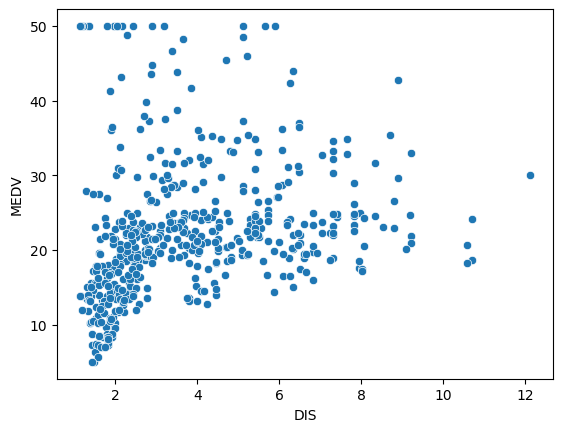

In [19]:
#Task 3d: What is the impact of an additional weighted distance to the five Boston emplyoment centres on the median value of owner occupied homes? 

#H0: There is no impact of the distance weighted distance to the five Boston emplyoment centres on the median value of owner occupied homes. 
#H1: The weighted distance to the five Boston employment centres has an impact on the median value. 

#visualize relationship
sns.scatterplot(boston_df, x= 'DIS', y = 'MEDV')
#scatterplot already points to a positive relationship. 

#regression: X independent variable: weighted distance to the five Boston employment centres. 
X = boston_df['DIS']
#Y dependent variable: median value 
y = boston_df['MEDV']

#Add intercept
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

#Summary stats
model.summary()

#Conclusion: The coefficient on DIS is statistically significant and positive. The p-value is < 0.05, hence we reject the Null hypothesis. An additional weighted distance to the five Boston employment centres increases the median value of owner occupied  
